In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Gender         200 non-null    int64
 2   Age            200 non-null    int64
 3   AnnualIncome   200 non-null    int64
 4   SpendingScore  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [12]:
customer_data.shape

(200, 5)

In [5]:
customer_data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']


In [9]:
# Convert Gender to numerical
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

In [10]:
# Rename columns to ensure correct names are used
customer_data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

# Group by Gender and describe numerical columns using the correct column names
customer_data.groupby('Gender')[['Age', 'AnnualIncome', 'SpendingScore']].describe()

Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Gender                                                               
0        88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   
1       112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   

       AnnualIncome             ...               SpendingScore             \
              count       mean  ...    75%    max         count       mean   
Gender                          ...                                          
0              88.0  62.227273  ...  78.00  137.0          88.0  48.511364   
1             112.0  59.250000  ...  77.25  126.0         112.0  51.526786   

                                               
             std  min   25%   50%   75%   max  
Gender                                         
0       27.89677  1.0  24.5  50.0  70.0  97.0  
1       24.11495  5.0  35.0  50.0  73.0  99.0  

[2 rows x 24 columns]

In [11]:
# Simple mean difference
mean_diff = customer_data.groupby('Gender')[['Age', 'AnnualIncome', 'SpendingScore']].mean()
print(mean_diff)

# Check if the index contains 0 and 1 before accessing them
if 0 in mean_diff.index and 1 in mean_diff.index:
    # Optional: Show the differences
    diff = mean_diff.loc[1] - mean_diff.loc[0]  # Female - Male
    print("Difference (Female - Male):\n", diff)
else:
    print("Data does not contain both Male and Female entries, cannot calculate difference.")

              Age  AnnualIncome  SpendingScore
Gender                                        
0       39.806818     62.227273      48.511364
1       38.098214     59.250000      51.526786
Difference (Female - Male):
 Age             -1.708604
AnnualIncome    -2.977273
SpendingScore    3.015422
dtype: float64


In [13]:
customer_data.describe()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [15]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


<ipython-input-6-73ef7addcfa1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=customer_data, palette='Set2')


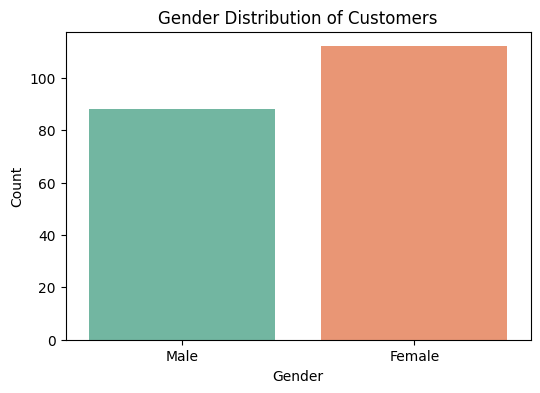

In [6]:
# Count of customers by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=customer_data, palette='Set2')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<ipython-input-17-4fe72775319b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=customer_data, palette='viridis')


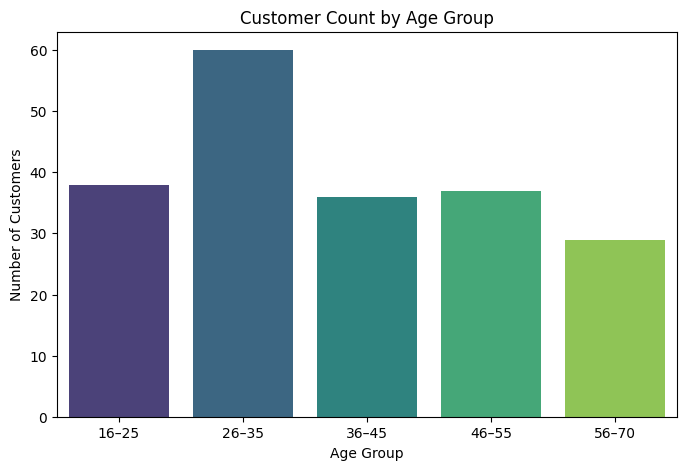

In [17]:
#Create age bins
customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins=[15, 25, 35, 45, 55, 70], labels=['16–25', '26–35', '36–45', '46–55', '56–70'])

# Plot bar chart
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', data=customer_data, palette='viridis')
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-20-396939329743>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncomeGroup', data=customer_data, palette='coolwarm')


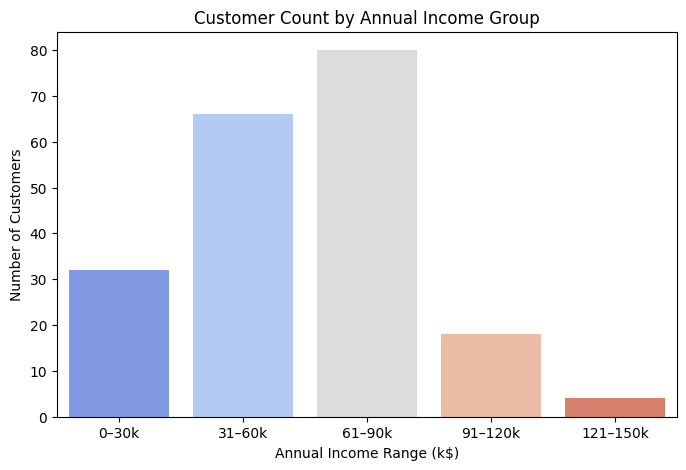

In [20]:
# Create income bins
customer_data['IncomeGroup'] = pd.cut(customer_data['AnnualIncome'], bins=[0, 30, 60, 90, 120, 150], labels=['0–30k', '31–60k', '61–90k', '91–120k', '121–150k'])

# Plot bar chart
plt.figure(figsize=(8,5))
sns.countplot(x='IncomeGroup', data=customer_data, palette='coolwarm')
plt.title('Customer Count by Annual Income Group')
plt.xlabel('Annual Income Range (k$)')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-21-3dd7c0ec1d3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SpendingGroup', data=customer_data, palette='magma')


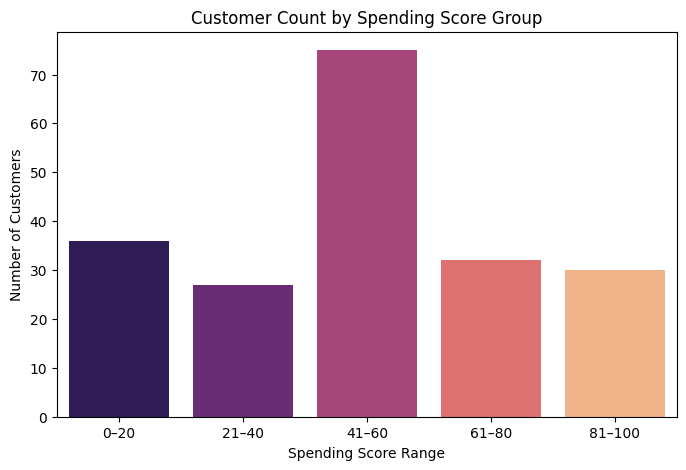

In [21]:
#Create bins for Spending Score
customer_data['SpendingGroup'] = pd.cut(customer_data['SpendingScore'], bins=[0, 20, 40, 60, 80, 100], labels=['0–20', '21–40', '41–60', '61–80', '81–100'])

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='SpendingGroup', data=customer_data, palette='magma')
plt.title('Customer Count by Spending Score Group')
plt.xlabel('Spending Score Range')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-24-bf7ff3911aff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=customer_data, palette='Set2')


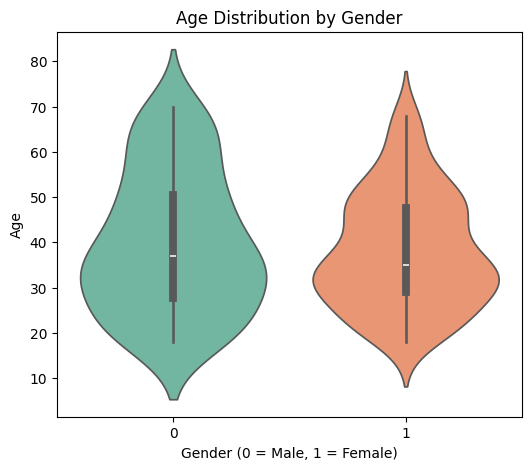

In [24]:
#violin plot of age by gender
plt.figure(figsize=(6,5))
sns.violinplot(x='Gender', y='Age', data=customer_data, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Age')
plt.show()

<ipython-input-25-f8cc798f75f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='AnnualIncome', data=customer_data, palette='pastel')


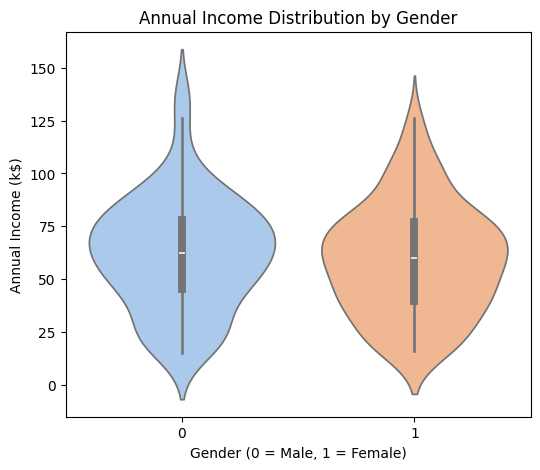

In [25]:
#violin plot of annual income by gender
plt.figure(figsize=(6,5))
sns.violinplot(x='Gender', y='AnnualIncome', data=customer_data, palette='pastel')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Annual Income (k$)')
plt.show()


<ipython-input-26-9fb322ec7105>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='SpendingScore', data=customer_data, palette='cool')


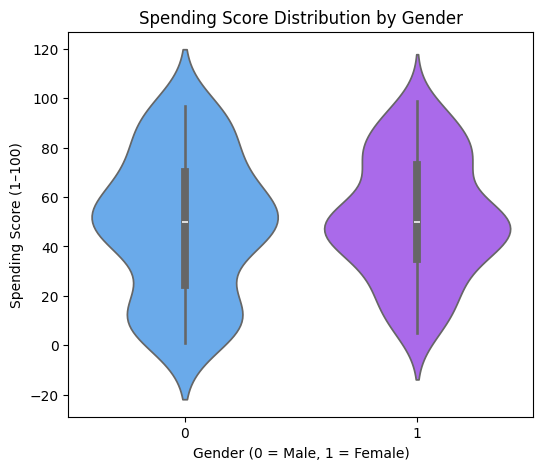

In [26]:
#violin plot of spending score by gender
plt.figure(figsize=(6,5))
sns.violinplot(x='Gender', y='SpendingScore', data=customer_data, palette='cool')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Spending Score (1–100)')
plt.show()


Choosing the Annual Income Column & Spending Score column

In [27]:
X = customer_data.iloc[:,[3,4]].values

In [28]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Data for Clustering

In [29]:
# Choose relevant features
features = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore']
X = customer_data[features]

# Import StandardScaler
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [30]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

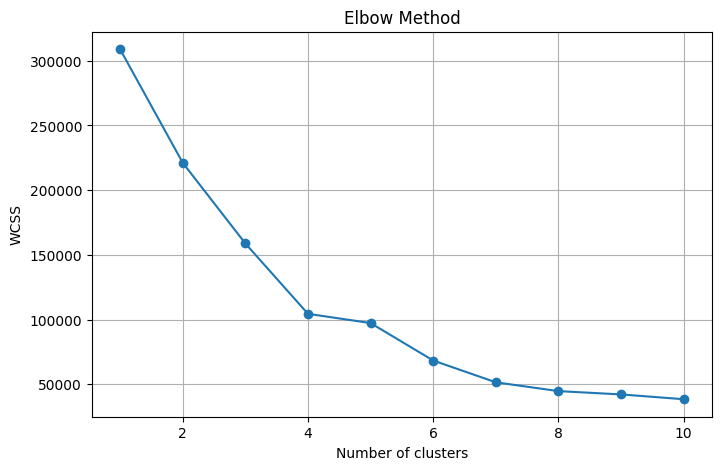

In [31]:
# Plot the elbow curve

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Optium Number of Clusters = 5

Training the K-Means Clustering Model

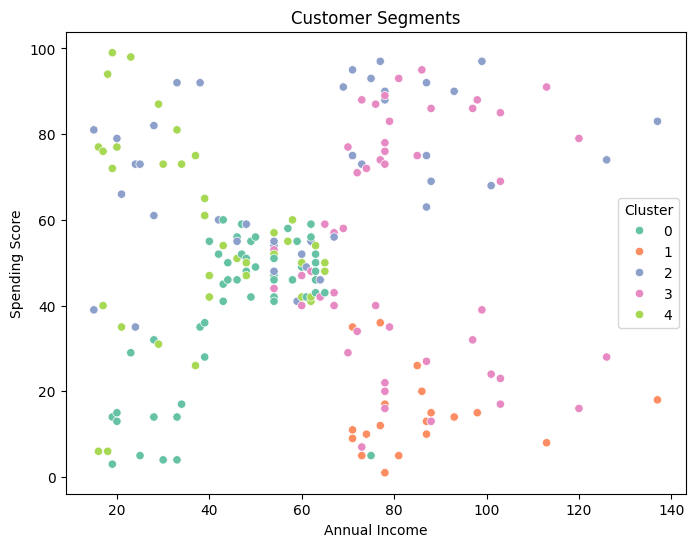

In [32]:
# Apply KMeans with optimal number of clusters (say, 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=customer_data, palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

5 Clusters - 0,1,2,3,4

Hierarchical Clustering

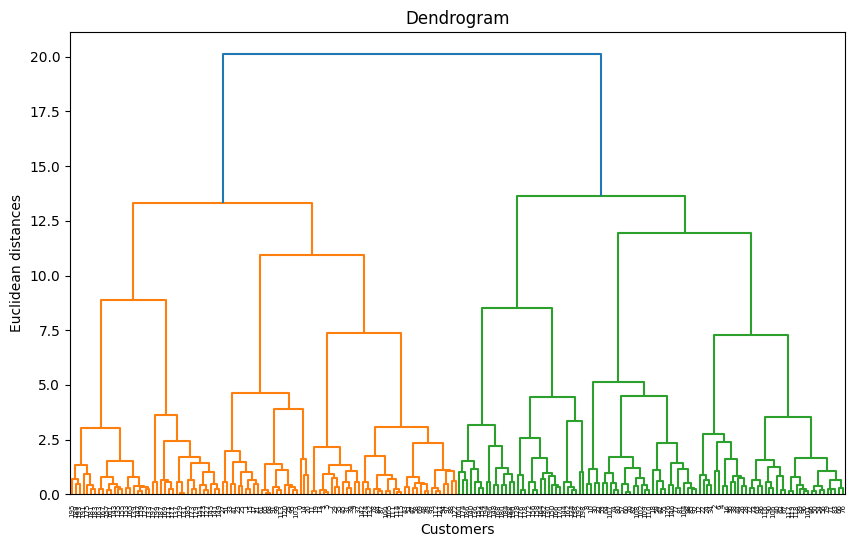

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram to find optimal number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# From the dendrogram, we assume 5 clusters (you can change this)
# Remove the affinity parameter as it's not needed with linkage='ward'
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
customer_data['HCluster'] = hc.fit_predict(X_scaled)

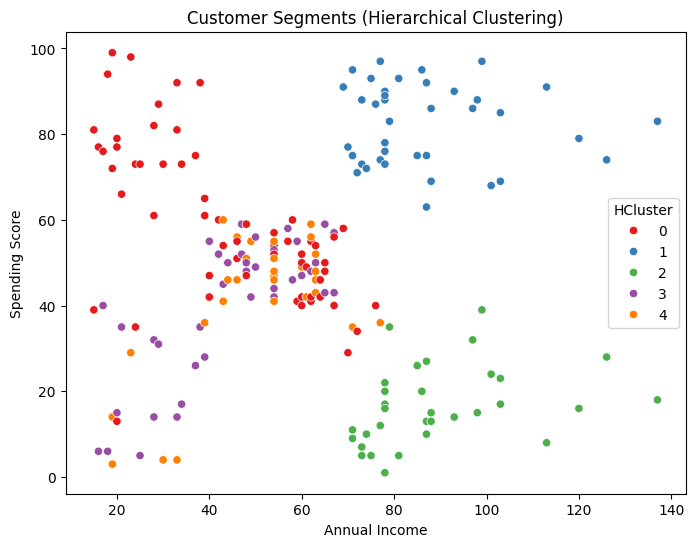

In [34]:
# Visualize Hierarchical Clustering results

plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='HCluster', data=customer_data, palette='Set1')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature set
X_model = customer_data[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']]
y_model = customer_data['Cluster']  # Or use 'HCluster' for Hierarchical labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42)


In [37]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9
           3       0.79      0.94      0.86        16
           4       0.91      0.77      0.83        13

    accuracy                           0.90        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.91      0.90      0.90        60

Accuracy: 0.9


In [39]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

# Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9
           3       0.94      0.94      0.94        16
           4       0.92      0.92      0.92        13

    accuracy                           0.95        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.95      0.95      0.95        60

Accuracy: 0.95


In [40]:
from sklearn.decomposition import PCA

# Apply PCA

# Let's reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame for plotting
customer_data['PCA1'] = X_pca[:, 0]
customer_data['PCA2'] = X_pca[:, 1]

print("Explained variance by PCA components:", pca.explained_variance_ratio_)


Explained variance by PCA components: [0.33690046 0.26230645]


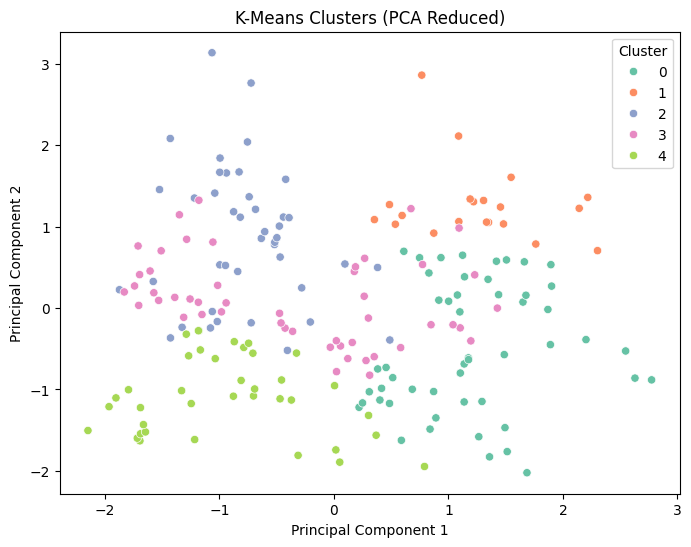

In [41]:
plt.figure(figsize=(8,6))
# Use the updated customer_data DataFrame with 'Cluster' column
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data = customer_data, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

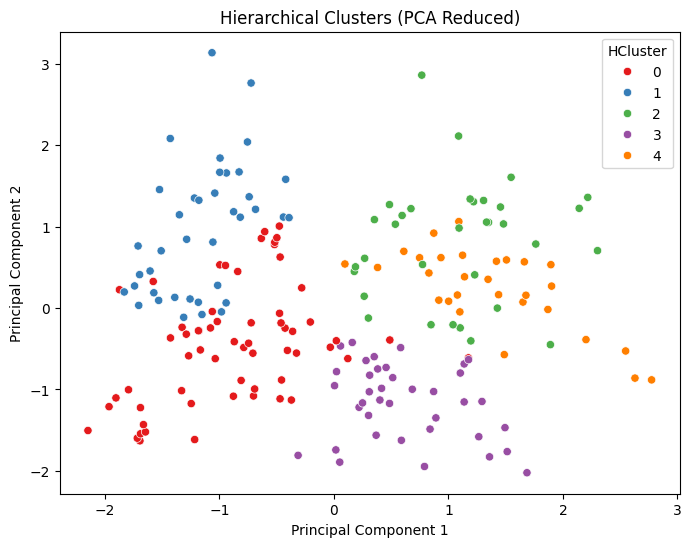

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='HCluster', data=customer_data, palette='Set1')
plt.title('Hierarchical Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
